In [35]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [36]:
#temperature dataset
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
#convert to tensor
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)/100 #normalize to reduce the scale of input values

In [37]:
#define model with quadratic term
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [38]:
#define loss fuction (MSE)
def loss_fn(y, t_c):
  #calculate MSE between predictions and actual values
  return ((y - t_c)** 2).mean()

In [39]:
#train using GD
def train_model(t_u, t_c, learning_rate, epochs):
  #initialize weight and bias with require_grad=True to track gradients
  w1 = torch.ones((), requires_grad=True)
  w2 = torch.ones((), requires_grad=True)
  b = torch.zeros(1, requires_grad=True)

  #use stochastic gradient descent (SGD) optimizer
  optimizer = optim.SGD([w1, w2, b], lr=learning_rate)

  losses = []
  for epoch in range(epochs):
    #forward pass: compute predicted values
    y_pred = model(t_u, w1, w2, b)
    #compute loss
    loss = loss_fn(y_pred, t_c)

    #record loss for every 500 epochs
    if epoch % 500 == 0:
      losses.append(loss.item())
      print(f"Epoch {epoch}, Loss: {loss.item()}")

    #backward pass: zero gradients, compute new gradients, and update parameters
    optimizer.zero_grad() #zero out gradients from previous step
    loss.backward() #compute gradients
    optimizer.step() #update parameters using gradient

  return w1, w2, b, losses



Training with learning rate: 0.1
Epoch 0, Loss: 165.44952392578125
Epoch 500, Loss: 2.1081762313842773
Epoch 1000, Loss: 2.090728282928467
Epoch 1500, Loss: 2.090721845626831
Epoch 2000, Loss: 2.0907211303710938
Epoch 2500, Loss: 2.090721845626831
Epoch 3000, Loss: 2.090721607208252
Epoch 3500, Loss: 2.090721845626831
Epoch 4000, Loss: 2.090721607208252
Epoch 4500, Loss: 2.0907211303710938

Training with learning rate: 0.005
Epoch 0, Loss: 165.44952392578125
Epoch 500, Loss: 38.10788345336914
Epoch 1000, Loss: 26.23138999938965
Epoch 1500, Loss: 18.27117156982422
Epoch 2000, Loss: 12.935779571533203
Epoch 2500, Loss: 9.359696388244629
Epoch 3000, Loss: 6.962811470031738
Epoch 3500, Loss: 5.356269359588623
Epoch 4000, Loss: 4.279475212097168
Epoch 4500, Loss: 3.557748317718506

Training with learning rate: 0.001
Epoch 0, Loss: 165.44952392578125
Epoch 500, Loss: 58.77534484863281
Epoch 1000, Loss: 48.338401794433594
Epoch 1500, Loss: 44.389854431152344
Epoch 2000, Loss: 41.112152099609

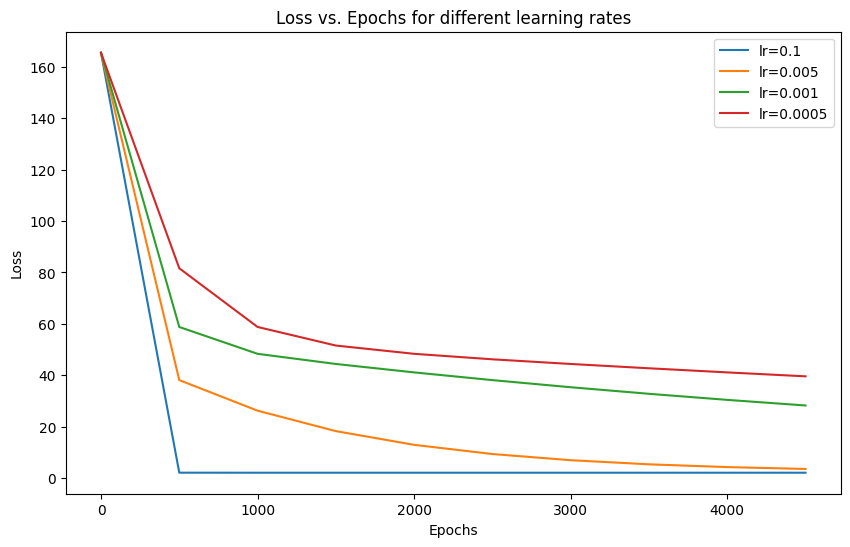

In [40]:
# 1.b Train with different learning rates and report losses
epochs = 5000
learning_rates = [0.1, 0.005, 0.001, 0.0005]
all_losses = {}

# Train the model for each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    w1, w2, b, losses = train_model(t_u, t_c, lr, epochs)
    all_losses[lr] = losses

#plot losses for each lr to visualize convergence
plt.figure(figsize=(10, 6))
for lr, losses in all_losses.items():
    plt.plot(range(0, len(losses) * 500, 500), losses, label=f'lr={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs for different learning rates')
plt.show()

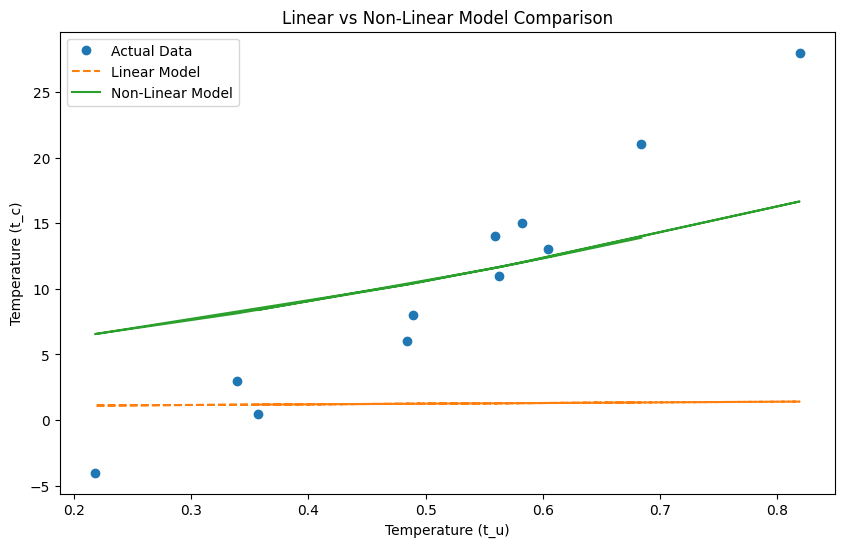

In [41]:
#1c pick the best non-linear model and compare to linear model.
w1_linear = torch.tensor(0.5) #placeholder
w2_linear = torch.tensor(0.0) #linear model does not have w2
b_linear = torch.tensor(1.0) #placeholder

# Compute predictions for both linear and non-linear models
y_linear = w1_linear * t_u + b_linear
y_nonlinear = w2 * t_u ** 2 + w1 * t_u + b

# Plot the actual data, linear model predictions, and non-linear model predictions
plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Actual Data')  # Plot actual data points
plt.plot(t_u.numpy(), y_linear.detach().numpy(), label='Linear Model', linestyle='--')  # Plot linear model
plt.plot(t_u.numpy(), y_nonlinear.detach().numpy(), label='Non-Linear Model', linestyle='-')  # Plot non-linear model
plt.xlabel('Temperature (t_u)')
plt.ylabel('Temperature (t_c)')
plt.legend()
plt.title('Linear vs Non-Linear Model Comparison')
plt.show()

# **Problem 2**

In [154]:
import pandas as pd
import torch.nn as nn
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [155]:
#mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
#loading dataset
housing_data = pd.read_csv('/content/drive/MyDrive/Class/Intro-to-ML-main/Datasets/Housing.csv')

In [183]:
#select the relevant input features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

#extract input features (X) and target (y)
X = housing_data[features].values
y = housing_data[target].values

#normalizing target variable
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [184]:
#split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the input features for better training stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [185]:
#convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor((y_train - y_mean) / y_std, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor((y_val - y_mean) / y_std, dtype=torch.float32).view(-1, 1)

In [186]:
#define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [203]:
#intialize input dimen
input_dim = len(features )

In [209]:
#training model with diff learning rate
epochs = 5000
learning_rates = [0.01, 0.001, 0.0001, 0.0001]
all_train_losses = {}
all_val_losses = {}


Training with learning rate: 0.01
Epoch 0, Training Loss: 8.37472152709961
Epoch 0, Validation Loss: 7.310389995574951
Epoch 500, Training Loss: 4.9248174036620185e-06
Epoch 500, Validation Loss: 7.004722192505142e-06
Epoch 1000, Training Loss: 3.2417737383383383e-09
Epoch 1000, Validation Loss: 4.695130950693738e-09
Epoch 1500, Training Loss: 3.7012237025235706e-11
Epoch 1500, Validation Loss: 3.779826451832946e-11
Epoch 2000, Training Loss: 3.4626117945135704e-11
Epoch 2000, Validation Loss: 3.408049883968367e-11
Epoch 2500, Training Loss: 3.461007869187682e-11
Epoch 2500, Validation Loss: 3.404190818123709e-11
Epoch 3000, Training Loss: 3.4603691440038276e-11
Epoch 3000, Validation Loss: 3.409197230075378e-11
Epoch 3500, Training Loss: 3.4597564396721125e-11
Epoch 3500, Validation Loss: 3.414933613665738e-11
Epoch 4000, Training Loss: 3.459013284135004e-11
Epoch 4000, Validation Loss: 3.414933613665738e-11
Epoch 4500, Training Loss: 3.460265060595269e-11
Epoch 4500, Validation Loss

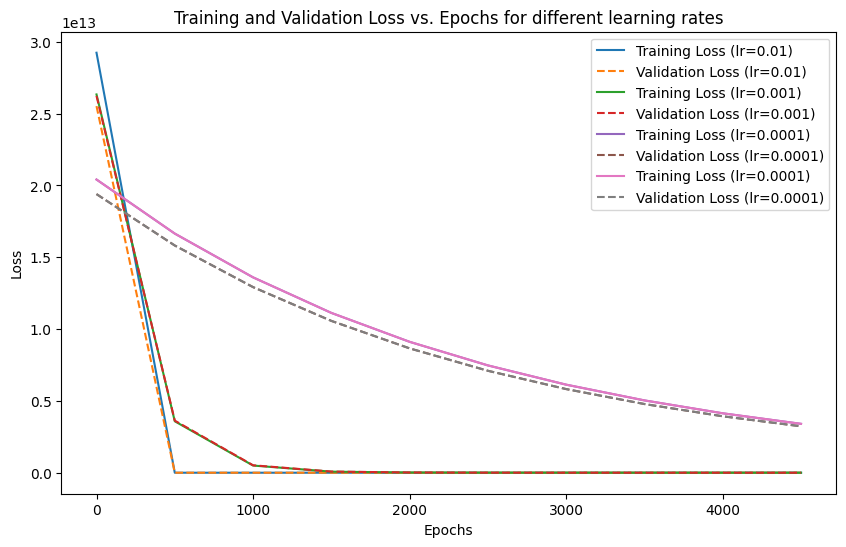

In [210]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    # Initialize the model, loss function, and optimizer for each learning rate
    model = LinearRegressionModel(input_dim)
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor)

        # Zero gradients, perform backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record training and validation loss every 500 epochs
        if epoch % 500 == 0:
            train_losses.append(loss.item())
            print(f"Epoch {epoch}, Training Loss: {loss.item()}")

            # Validation phase
            model.eval()
            with torch.no_grad():
                y_val_pred = model(X_val_tensor)
                val_loss = loss_fn(y_val_pred, y_val_tensor)
                val_losses.append(val_loss.item())
                print(f"Epoch {epoch}, Validation Loss: {val_loss.item()}")

    #de-normalize training and validation losses
    all_train_losses[lr] = [train_loss * y_std**2 for train_loss in train_losses]
    all_val_losses[lr] = [val_loss * y_std**2 for val_loss in val_losses]

#plot training and validation losses for each learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    num_points = len(all_train_losses[lr])
    plt.plot(range(0, num_points * 500, 500), all_train_losses[lr], label=f'Training Loss (lr={lr})')
    plt.plot(range(0, num_points * 500, 500), all_val_losses[lr], linestyle='--', label=f'Validation Loss (lr={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Epochs for different learning rates')
plt.show()

# **Problem 3**

In [211]:
#select all input features and target variable
features = housing_data.columns.drop('price').tolist()
target = 'price'

#encode categorical features
housing_data = pd.get_dummies(housing_data, drop_first=True)

#extract input features (X) and target (y)
features = housing_data.columns.drop('price').tolist()
X = housing_data[features].values
y = housing_data[target].values

#normalize the target variable
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [212]:
#split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the input features for better training stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [213]:
#convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor((y_train - y_mean) / y_std, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor((y_val - y_mean) / y_std, dtype=torch.float32).view(-1, 1)

In [214]:
#define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

#initialize input dimension
input_dim = len(features)

#train the model using different learning rates
epochs = 5000
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
all_train_losses = {}
all_val_losses = {}



Training with learning rate: 0.01
Epoch 0, Training Loss: 7.956684112548828
Epoch 0, Validation Loss: 8.071844100952148
Epoch 500, Training Loss: 1.0279072739649564e-05
Epoch 500, Validation Loss: 1.3214793398219626e-05
Epoch 1000, Training Loss: 7.218085684712605e-09
Epoch 1000, Validation Loss: 9.92079929318379e-09
Epoch 1500, Training Loss: 3.9934978934841325e-11
Epoch 1500, Validation Loss: 4.135280659567364e-11
Epoch 2000, Training Loss: 3.467552980862543e-11
Epoch 2000, Validation Loss: 3.422078245773896e-11
Epoch 2500, Training Loss: 3.458400579803289e-11
Epoch 2500, Validation Loss: 3.412482449394183e-11
Epoch 3000, Training Loss: 3.4595999676145794e-11
Epoch 3000, Validation Loss: 3.4123783659856244e-11
Epoch 3500, Training Loss: 3.4603691440038276e-11
Epoch 3500, Validation Loss: 3.417488861345852e-11
Epoch 4000, Training Loss: 3.4596783771156936e-11
Epoch 4000, Validation Loss: 3.414933613665738e-11
Epoch 4500, Training Loss: 3.4596783771156936e-11
Epoch 4500, Validation Lo

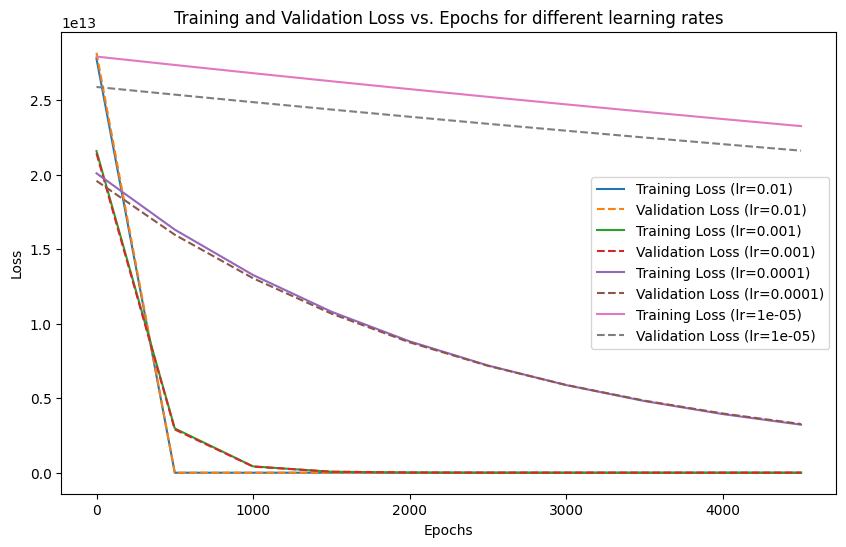

In [215]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    #initialize the model, loss function, and optimizer for each learning rate
    model = LinearRegressionModel(input_dim)
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        #training phase
        model.train()
        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor)

        #zero gradients, perform backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #record training and validation loss every 500 epochs
        if epoch % 500 == 0:
            train_losses.append(loss.item())
            print(f"Epoch {epoch}, Training Loss: {loss.item()}")

            #validation phase
            model.eval()
            with torch.no_grad():
                y_val_pred = model(X_val_tensor)
                val_loss = loss_fn(y_val_pred, y_val_tensor)
                val_losses.append(val_loss.item())
                print(f"Epoch {epoch}, Validation Loss: {val_loss.item()}")

    #de-normalize training and validation losses
    all_train_losses[lr] = [train_loss * y_std**2 for train_loss in train_losses]
    all_val_losses[lr] = [val_loss * y_std**2 for val_loss in val_losses]

# Plot training and validation losses for each learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    num_points = len(all_train_losses[lr])
    plt.plot(range(0, num_points * 500, 500), all_train_losses[lr], label=f'Training Loss (lr={lr})')
    plt.plot(range(0, num_points * 500, 500), all_val_losses[lr], linestyle='--', label=f'Validation Loss (lr={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Epochs for different learning rates')
plt.show()
